# <span style="color:blue"> Zadanie 66 STR. 119

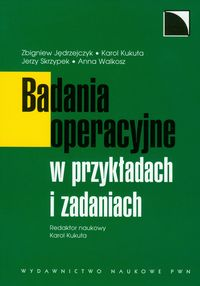

In [1]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Magazyn:", "Piekarnia:1","Piekarnia:2","Piekarnia:3","Piekarnia:4", "Limit dostaw"]
table.append_row(["Magazyn_A",   "25 km",   "24 km",   "28 km", "13 km","130 t"])
table.append_row(["Magazyn_B",   "17 km",   "30 km",   "15 km", "26 km","200 t" ])
table.append_row(["Limitu odbiorów",   "80 t",    "120 t",   "70 t",   "60 t","330 t" ])
print(table)

+----------------+-----------+------------+-----------+-----------+------------+
|    Magazyn:    | Piekarnia | Piekarnia: | Piekarnia | Piekarnia | Limit dost |
|                |    :1     |     2      |    :3     |    :4     |     aw     |
+----------------+-----------+------------+-----------+-----------+------------+
|   Magazyn_A    |   25 km   |   24 km    |   28 km   |   13 km   |   130 t    |
+----------------+-----------+------------+-----------+-----------+------------+
|   Magazyn_B    |   17 km   |   30 km    |   15 km   |   26 km   |   200 t    |
+----------------+-----------+------------+-----------+-----------+------------+
| Limitu odbioró |   80 t    |   120 t    |   70 t    |   60 t    |   330 t    |
|       w        |           |            |           |           |            |
+----------------+-----------+------------+-----------+-----------+------------+


/home/wojciech/anaconda3/lib/python3.7/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/home/wojciech/anaconda3/lib/python3.7/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


In [2]:
80+120+70+60

330

### popyt równa się podaży - Zagadnienie transportowe zamknięte
Ilość mąki w magazynie jest taka sama jak popyt piekarni na mąkę (330).

<font size="6"> 
<font color="black">   
$\displaystyle \sum^{3}_{ {i=1}} A_{i} =  \displaystyle \sum^{3}_{ {j=1}} B_{j} = 330 t
$


<font size="2"> 
<font color="grey">   
$
\text{Zamknięte zadanie transportowe (ZZT)} \\
\text{podaż jest równa popytowi}
$

<font size="6"> 
<font color="black"> 
$
{
 \displaystyle {x_{(m,p)\,}}  \geqslant 0  {...} \forall  {m \in M},{p \in P} \\
}
$

<font size="2"> 
<font color="grey">
    
${    
\text{m,p - ilości dostaw reprezentowanych jako x są wieksze, równe zero} \\
\text{dla każdego elementu zbioru magazynów M i piekarni P} \\
}
$

<font size="6"> 
<font color="black"> 
$
{
 \displaystyle {x_{(m,p)\,}}  \in \mathbb{Z}^+  {...} \forall  {m \in M},{p \in P} \\
}
$

<font size="2"> 
<font color="grey">   

$ {   
\text{m,p - ilości dostaw reprezentowanych jako x należą do zbioru liczb całkowitych dodatnich} \\
\text{dla każdego elementu zbioru magazynów M i piekarni P} \\
}
$

<span style="font-size: 150%;color:#0000ff"> Funkcja celu</span>

<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {m \in M},{p \in P}} c_{(m,p)}x_{(m,p)} \to  min 
$


<font size="2"> 
<font color="grey">   
$
\text{Funkcja celu zmierza do minimalizacji sumy kilometrów transportu z magazynów M do piekrani P} \\
\text{}
$

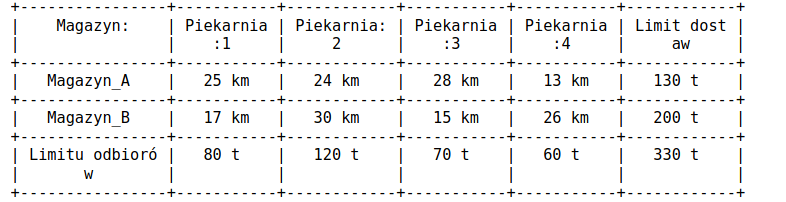

<span style="font-size: 100%;color:'black"> Suma ograniczeń S</span>

<span style="font-size: 250%;color:#0000ff"> Dostawcy</span>

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}} & \leqslant 130 & (1)\\
{x_{21}+x_{22}+x_{23}+x_{24}} & \leqslant 200 & (2)\\
\end{align}
\right. 
$



<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {b \in B}} x_{(w,b)} \leqslant  S_w {...} \forall  {w \in W}
$


<font size="2"> 
<font color="grey">   
$
\text{ilość ton x nie może być większ niż ilość ton w magazynie} \\
\text{z którego te tony są transportowane}
$

In [3]:
from pulp import *

# Tworze listę dostawców
Magazyny = ["1","2"]

# Tworze słownik ile każdy dostawca może dostarczyć towaru
supply = {"1": 130,
          "2": 200
          }

<span style="font-size: 250%;color:#0000ff"> Odbiorcy</span>

przenicę można odstawić do trzech różnych skupów

#### $
\left\{
\begin{align} 
{x_{11}+ x_{21}} & \geqslant 80 & (1)\\
{x_{12}+ x_{22}} & \geqslant 120 & (2)\\
{x_{13}+ x_{23}} & \geqslant 70 & (3)\\
{x_{14}+ x_{24}} & \geqslant 60 & (4)\\
\end{align}
\right. 
$

<font size="6"> 
<font color="black">   
$\displaystyle \sum_{ {m \in M}, {p \in p}} x_{(m,p)} \geqslant  d_m {...} \forall  {m \in M}
$


<font size="2"> 
<font color="grey">   
$
\text{ilość ton x dostarczanych z magazynu m do piekarni P nie może być mniejsza niż popyt d} \\
\text{jaki występuje w danej piekarni p, dla każdej piekarni p ze zbioru piekarni P}
$

In [4]:
# Tworzę listę odbiorców
Piekarnie = ["1", "2", "3","4"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {"1": 80,
        "2": 120,
        "3": 70,
        "4": 60
        }
print('Magazyny:',Magazyny)
print('supply:',supply)
print('Piekarnie:',Piekarnie)
print('demand:',demand)

Magazyny: ['1', '2']
supply: {'1': 130, '2': 200}
Piekarnie: ['1', '2', '3', '4']
demand: {'1': 80, '2': 120, '3': 70, '4': 60}


<span style="font-size: 250%;color:#0000ff"> Tworzę nacierz jednostkowych kosztów transportu</span>

In [5]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Magazyn:", "Piekarnia:1","Piekarnia:2","Piekarnia:3","Piekarnia:4", "Limit dostaw"]
table.append_row(["Magazyn_A",   "25 km",   "24 km",   "28 km", "13 km","130 t"])
table.append_row(["Magazyn_B",   "17 km",   "30 km",   "15 km", "26 km","200 t" ])
table.append_row(["Limitu odbiorów",   "80 t",    "120 t",   "70 t",   "60 t","330 t" ])
print(table)

+----------------+-----------+------------+-----------+-----------+------------+
|    Magazyn:    | Piekarnia | Piekarnia: | Piekarnia | Piekarnia | Limit dost |
|                |    :1     |     2      |    :3     |    :4     |     aw     |
+----------------+-----------+------------+-----------+-----------+------------+
|   Magazyn_A    |   25 km   |   24 km    |   28 km   |   13 km   |   130 t    |
+----------------+-----------+------------+-----------+-----------+------------+
|   Magazyn_B    |   17 km   |   30 km    |   15 km   |   26 km   |   200 t    |
+----------------+-----------+------------+-----------+-----------+------------+
| Limitu odbioró |   80 t    |   120 t    |   70 t    |   60 t    |   330 t    |
|       w        |           |            |           |           |            |
+----------------+-----------+------------+-----------+-----------+------------+


In [6]:

        #piekarnie
        # 1  2  3  4   
km = [   
        [25,24,28,13], #A  Magazyny
        [17,30,15,26]   #B
         ]

In [7]:
# The cost data is made into a dictionary
km = makeDict([Magazyny,Piekarnie],km,0)
km

{'1': {'1': 25, '2': 24, '3': 28, '4': 13},
 '2': {'1': 17, '2': 30, '3': 15, '4': 26}}

In [8]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("zad66str119",LpMinimize)
print(prob)

zad66str119:
MINIMIZE
None
VARIABLES



In [9]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Magazyny for b in Piekarnie]
print(Routes)

[('1', '1'), ('1', '2'), ('1', '3'), ('1', '4'), ('2', '1'), ('2', '2'), ('2', '3'), ('2', '4')]


In [10]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Magazyny,Piekarnie),0,None,LpInteger)
vars

{'1': {'1': Route_1_1, '2': Route_1_2, '3': Route_1_3, '4': Route_1_4},
 '2': {'1': Route_2_1, '2': Route_2_2, '3': Route_2_3, '4': Route_2_4}}

In [11]:
# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*km[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"
prob

zad66str119:
MINIMIZE
25*Route_1_1 + 24*Route_1_2 + 28*Route_1_3 + 13*Route_1_4 + 17*Route_2_1 + 30*Route_2_2 + 15*Route_2_3 + 26*Route_2_4 + 0
VARIABLES
0 <= Route_1_1 Integer
0 <= Route_1_2 Integer
0 <= Route_1_3 Integer
0 <= Route_1_4 Integer
0 <= Route_2_1 Integer
0 <= Route_2_2 Integer
0 <= Route_2_3 Integer
0 <= Route_2_4 Integer

In [12]:
# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Magazyny:
    prob += lpSum([vars[w][b] for b in Piekarnie])<=supply[w], "Sum_of_Products_out_of_Warehouse_%s"%w
prob

zad66str119:
MINIMIZE
25*Route_1_1 + 24*Route_1_2 + 28*Route_1_3 + 13*Route_1_4 + 17*Route_2_1 + 30*Route_2_2 + 15*Route_2_3 + 26*Route_2_4 + 0
SUBJECT TO
Sum_of_Products_out_of_Warehouse_1: Route_1_1 + Route_1_2 + Route_1_3
 + Route_1_4 <= 130

Sum_of_Products_out_of_Warehouse_2: Route_2_1 + Route_2_2 + Route_2_3
 + Route_2_4 <= 200

VARIABLES
0 <= Route_1_1 Integer
0 <= Route_1_2 Integer
0 <= Route_1_3 Integer
0 <= Route_1_4 Integer
0 <= Route_2_1 Integer
0 <= Route_2_2 Integer
0 <= Route_2_3 Integer
0 <= Route_2_4 Integer

In [13]:
# The demand minimum constraints are added to prob for each demand node (bar)
for b in Piekarnie:
    prob += lpSum([vars[w][b] for w in Magazyny])>=demand[b], "Sum_of_Products_into_Bar%s"%b
prob

zad66str119:
MINIMIZE
25*Route_1_1 + 24*Route_1_2 + 28*Route_1_3 + 13*Route_1_4 + 17*Route_2_1 + 30*Route_2_2 + 15*Route_2_3 + 26*Route_2_4 + 0
SUBJECT TO
Sum_of_Products_out_of_Warehouse_1: Route_1_1 + Route_1_2 + Route_1_3
 + Route_1_4 <= 130

Sum_of_Products_out_of_Warehouse_2: Route_2_1 + Route_2_2 + Route_2_3
 + Route_2_4 <= 200

Sum_of_Products_into_Bar1: Route_1_1 + Route_2_1 >= 80

Sum_of_Products_into_Bar2: Route_1_2 + Route_2_2 >= 120

Sum_of_Products_into_Bar3: Route_1_3 + Route_2_3 >= 70

Sum_of_Products_into_Bar4: Route_1_4 + Route_2_4 >= 60

VARIABLES
0 <= Route_1_1 Integer
0 <= Route_1_2 Integer
0 <= Route_1_3 Integer
0 <= Route_1_4 Integer
0 <= Route_2_1 Integer
0 <= Route_2_2 Integer
0 <= Route_2_3 Integer
0 <= Route_2_4 Integer

In [14]:
# The problem data is written to an .lp file
prob.writeLP("zad66str119.lp")

[Route_1_1,
 Route_1_2,
 Route_1_3,
 Route_1_4,
 Route_2_1,
 Route_2_2,
 Route_2_3,
 Route_2_4]

In [15]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

In [16]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


In [17]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_1_1 = 0.0
Route_1_2 = 70.0
Route_1_3 = 0.0
Route_1_4 = 60.0
Route_2_1 = 80.0
Route_2_2 = 50.0
Route_2_3 = 70.0
Route_2_4 = 0.0


In [18]:
# The optimised objective function value is printed to the screen    
print("Total km of Transportation = ", value(prob.objective))

Total km of Transportation =  6370.0


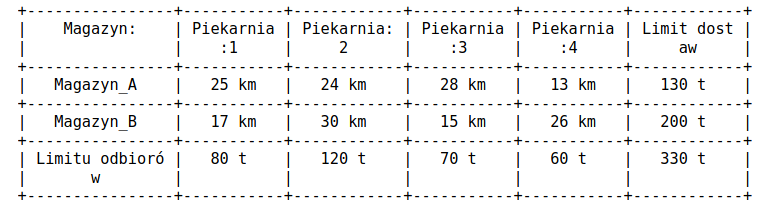

In [19]:
x11 = 0
x12 = 70
x13 = 0
x14 = 60
x21 = 80
x22 = 50
x23 = 70
x24 = 0

k = 25*x11+24*x12+28*x13+13*x14+17*x21+30*x22+15*x23+26*x24

p1 = x11 + x12 + x13 +x14
p2 = x21 + x22 + x23 +x24

p4 = x11 + x21  
p5 = x12 + x22 
p6 = x13 + x23 
p7 = x14 + x24

from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["", "tyle wyszło ton", "Wielkość zapotrzebowania"]
table.append_row(["Magazyn A",   p1,   "<= 130" ])
table.append_row(["Magazyn B",  p2,    "<= 200" ])
table.append_row(["piekarnia 1",   p4,   "<= 80" ])
table.append_row(["piekarnia 2",   p5,    ">= 120" ])
table.append_row(["piekarnia 3",  p6,     ">= 70" ])
table.append_row(["piekarnia 4",   p7,    ">= 60" ])
print(table)

+-------------+-----------------+--------------------------+
|             | tyle wyszło ton | Wielkość zapotrzebowania |
+-------------+-----------------+--------------------------+
|  Magazyn A  |       130       |          <= 130          |
+-------------+-----------------+--------------------------+
|  Magazyn B  |       200       |          <= 200          |
+-------------+-----------------+--------------------------+
| piekarnia 1 |       80        |          <= 80           |
+-------------+-----------------+--------------------------+
| piekarnia 2 |       120       |          >= 120          |
+-------------+-----------------+--------------------------+
| piekarnia 3 |       70        |          >= 70           |
+-------------+-----------------+--------------------------+
| piekarnia 4 |       60        |          >= 60           |
+-------------+-----------------+--------------------------+
